<a href="https://colab.research.google.com/github/NullZoke/Fraud-Detection-Transaction/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Look at what I have done vs not done

In [225]:
#Transaction_ID	Unique identifier for each transaction
#Transaction_Amount	Amount of money involved in the transaction
#Transaction_Type	Type of transaction (Online, In-Store, ATM, etc.)
#Timestamp	Date and time of the transaction
#Percent of Money Taken
#Account_Balance	User's current account balance before the transaction
#Device_Type	Type of device used (Mobile, Desktop, etc.)
#Location	Geographical location of the transaction
#Merchant_Category	Type of merchant (Retail, Food, Travel, etc.)
#IP_Address_Flag	Whether the IP address was flagged as suspicious (0 or 1)
##Previous_Fraudulent_Activity	Number of past fraudulent activities by the user
#Daily_Transaction_Count	Number of transactions made by the user that day
#Avg_Transaction_Amount_7d	User's average transaction amount in the past 7 days
##Failed_Transaction_Count_7d	Count of failed transactions in the past 7 days
#Card_Type	Type of payment card used (Credit, Debit, Prepaid, etc.)
#Card_Age	Age of the card in months
#Transaction_Distance	Distance between the user's usual location and transaction location
#Authentication_Method	How the user authenticated (PIN, Biometric, etc.)
##Risk_Score	Fraud risk score computed for the transaction
#Is_Weekend	Whether the transaction occurred on a weekend (0 or 1)


#Target: Fraud_Label	Target variable (0 = Not Fraud, 1 = Fraud)


#Finished Researching Each Variable

# Findings

In [226]:
#100% chance of people with 4+ card declines being fraudulent applies to most fraud cards
#32% chance of someone committing fraud if they have already
#Card Type doesn't have correlation with fraud
#Risk Score over .86 detects fraud with 100% accuracy
#Risk Score over .76 Detects fraud with 82% accuracy


# Names for Different Codes Created

In [227]:
#ftd_df=the dataframe
#fraud_data_with_4_transactions
#fraudulent_data = data with fraud in it
#no_fraudulent_data = data with no fraud

# Importing/Downloading

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import os
import sklearn as skl
from scipy.stats import ttest_ind

In [229]:

# Download the dataset directory
path = kagglehub.dataset_download("samayashar/fraud-detection-transactions-dataset")
# Find the CSV file within the downloaded directory
cvs_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
# Read the CSV file into a Pandas DataFrame
ftd_df = pd.read_csv(os.path.join(path, cvs_file))
ftd_df.info()
# find info amounts about data (number of integers,floats,etc)
before_transaction= ftd_df['Account_Balance']
after_transaction=before_transaction-ftd_df['Transaction_Amount']
Percent_Of_Money_Taken=(ftd_df['Transaction_Amount']/before_transaction)
ftd_df.insert(10,'Percent_Of_Money_Taken',Percent_Of_Money_Taken)
ftd_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


5 Float, 7 Int, 9 Objects


# Data Cleaning


In [230]:
#checking for null values
ftd_df.isna().sum()
#checking for outlier card ages
ftd_df[ftd_df['Card_Age']>260]
len(ftd_df['Card_Type'].unique())
#finding what devices were used
print(ftd_df['Device_Type'].unique())
#Laptop, Mobile, Tablet (3 unique values)
print(ftd_df['Merchant_Category'].unique())
#Travel, Clothing, Restaurants, Electronics, Groceries,
ftd_df['Failed_Transaction_Count_7d'].min()
#0
ftd_df['Failed_Transaction_Count_7d'].max()
#4
ftd_df['Card_Type'].unique()
ftd_df['Card_Age'].mean()
#Card length is likely incorrectly labeled as "weeks" because average card length exceeds 5 years which is abnormal for cards used in dataset
ftd_df['Risk_Score'].median()
#understanding risk score ranges from 0-1 median is .55
ftd_df['Is_Weekend'].unique()
#checking values to make sure are correct
ftd_df['Fraud_Label'].unique()
#Data is clean generally;however, Card Length was mislabeled as 'months' instead of weeks

['Laptop' 'Mobile' 'Tablet']
['Travel' 'Clothing' 'Restaurants' 'Electronics' 'Groceries']


array([0, 1])

# Research Question

Explaining Methods

In this dataset, I want to look a few different correlations including how device type, merchant category, card type, and others correlate with chance of fraud. After I figure out this I want to create a machine learning model that can help predict whether someone is more or less likely to be a fradulent buyer using multiple different variables.

# Finding Correlation with Fraud

In [231]:
# Select only the numeric columns from the original DataFrame
numeric_ftd_df = ftd_df.select_dtypes(include=np.number)
correlation_matrix = numeric_ftd_df.corr()
print("Correlation with Fraud_Label:")
display(correlation_matrix['Fraud_Label'].sort_values(ascending=False))
#created a code to find correlation between different values and fraud

Correlation with Fraud_Label:


,Fraud_Label
Fraud_Label,1.000000
Failed_Transaction_Count_7d,0.509871
Risk_Score,0.385810
IP_Address_Flag,0.003028
Transaction_Amount,0.001901
Percent_Of_Money_Taken,0.000998
Avg_Transaction_Amount_7d,0.000703
Is_Weekend,0.000064
Transaction_Distance,-0.000116
Previous_Fraudulent_Activity,-0.000718


I found that the failed transacation count had a moderate correlation with fraud. With that information I decided to create a bar graph to visualize the data between the correlation of failed transaction counts in the past seven days and chance of fraud.


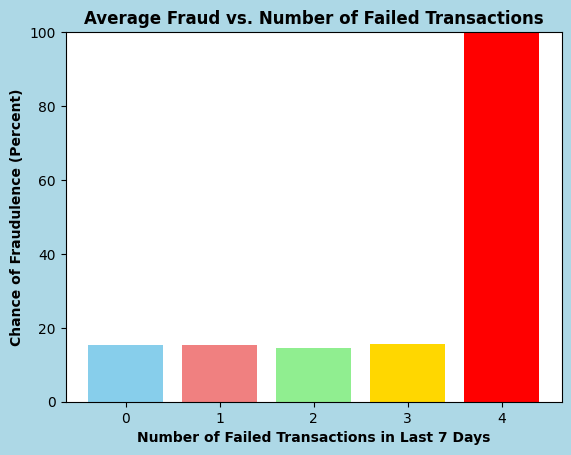

In [232]:
# Group by 'Failed_Transaction_Count_7d' and calculate the mean of 'Fraud_Label'
fraud_by_failed_count = ftd_df.groupby('Failed_Transaction_Count_7d')['Fraud_Label'].mean()
#Colored stuff to make barplot look cool
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold','red']
fig = plt.figure(facecolor='lightblue')
plt.bar(fraud_by_failed_count.index, fraud_by_failed_count.values*100,color=colors)
plt.xlabel('Number of Failed Transactions in Last 7 Days',fontweight='bold')
plt.ylabel('Chance of Fraudulence (Percent)',fontweight='bold')
plt.ylim(0, 100)
plt.title('Average Fraud vs. Number of Failed Transactions',fontweight='bold')
plt.xticks(fraud_by_failed_count.index) # Ensure all filed transaction counts are shown on x-axis
plt.show()

After seeing that any card with 4 or more failed card attempts were certain to be fraudulent I wanted to see how often 4 failed transactions occured

In [233]:
failed_transaction=4
fraud_data_with_4_transactions=ftd_df[ftd_df['Failed_Transaction_Count_7d']==failed_transaction]
fraud_data_with_4_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 1 to 49998
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                9954 non-null   object 
 1   User_ID                       9954 non-null   object 
 2   Transaction_Amount            9954 non-null   float64
 3   Transaction_Type              9954 non-null   object 
 4   Timestamp                     9954 non-null   object 
 5   Account_Balance               9954 non-null   float64
 6   Device_Type                   9954 non-null   object 
 7   Location                      9954 non-null   object 
 8   Merchant_Category             9954 non-null   object 
 9   IP_Address_Flag               9954 non-null   int64  
 10  Percent_Of_Money_Taken        9954 non-null   float64
 11  Previous_Fraudulent_Activity  9954 non-null   int64  
 12  Daily_Transaction_Count       9954 non-null   int64  
 13  Avg_Tra

Found there's 9954 fraudulent data values in this dataframe that can be found if a card failed 4 or more times in the past 7 days.

# Card Type Correlation with Fraud= none

In [234]:
#wanted to find total number of fraud counts in dataset
fraudulent_data=ftd_df[ftd_df['Fraud_Label']==1]
no_fraudulent_data=ftd_df[ftd_df['Fraud_Label']==0]
fraudulent_data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
7,TXN_49498,USER_4660,7.08,ATM Withdrawal,2023-02-25 03:43:00,45826.27,Tablet,London,Restaurants,0,...,3,164.38,4,Discover,182,1764.66,Biometric,0.5326,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,TXN_2433,USER_3990,8.44,POS,2023-10-24 19:27:00,96536.12,Laptop,London,Travel,0,...,13,326.71,3,Visa,159,940.42,Biometric,0.9602,0,1
49993,TXN_16850,USER_4192,202.66,Bank Transfer,2023-04-18 09:22:00,98989.44,Laptop,London,Groceries,0,...,6,366.35,4,Visa,195,1939.25,Password,0.3458,1,1
49996,TXN_44732,USER_1171,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,...,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49998,TXN_860,USER_2248,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,...,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


# History of Fraud correlation with Fraud

In [235]:
#wanted to find if histroy of fraud data increased chance of fraud
ftd_df['Previous_Fraudulent_Activity'].value_counts()
previous_fraud=ftd_df[ftd_df['Previous_Fraudulent_Activity'] == 1]
no_previous_fraud=ftd_df[ftd_df['Previous_Fraudulent_Activity'] == 0]
previous_fraud['Fraud_Label'].value_counts()
print(3344+1576)
print(1576/4920)
#32% chance that someone with previous fraud will commit fraudulent activities again
print(previous_fraud['Fraud_Label'].value_counts())
print(no_previous_fraud['Fraud_Label'].value_counts())
#32% chance that someone without previous fraud will commit fraud activity

4920
0.3203252032520325
Fraud_Label
0    3344
1    1576
Name: count, dtype: int64
Fraud_Label
0    30589
1    14491
Name: count, dtype: int64


# Geographic Location correlation with Fraud

In [236]:
#geographical lcoation
print(ftd_df['Location'].unique())
print(ftd_df['Location'].value_counts())
#comparing each seperate location with amount of fraud to see where most credit card stealers are located
fraudulent_data_location=ftd_df[ftd_df['Fraud_Label']==1]
fraudulent_data_location['Location'].value_counts()
#even spread of credit card stealers around the world surprisingly

['Sydney' 'New York' 'Mumbai' 'Tokyo' 'London']
Location
Tokyo       10208
Mumbai       9994
London       9945
Sydney       9938
New York     9915
Name: count, dtype: int64


,count
Location,
Tokyo,3315
New York,3221
Sydney,3194
London,3181
Mumbai,3156


# Transaction Type and Fraud Correlation


In [237]:
# Get value counts for 'Transaction_Type' in the original dataframe
print("Transaction Type counts in the original dataset:")
display(ftd_df['Transaction_Type'].value_counts())

# Filter the original dataframe for fraudulent transactions and get value counts for 'Transaction_Type'
fraudulent_data_transaction_counts = ftd_df[ftd_df['Fraud_Label'] == 1]['Transaction_Type'].value_counts()

print("\nTransaction Type counts in fraudulent transactions:")
display(fraudulent_data_transaction_counts)
#no correlation found

Transaction Type counts in the original dataset:


,count
Transaction_Type,
POS,12549
Online,12546
ATM Withdrawal,12453
Bank Transfer,12452



Transaction Type counts in fraudulent transactions:


,count
Transaction_Type,
ATM Withdrawal,4046
Online,4031
Bank Transfer,3995
POS,3995


# Merchant Category

In [238]:
ftd_df['Merchant_Category'].value_counts()
#Travel, Clothing, Restaurants, Electronics, Groceries
fraudulent_data_merchant=ftd_df[ftd_df['Fraud_Label']==1]
fraudulent_data_merchant['Merchant_Category'].value_counts()
#restaurants are slightly more common for fraudulent activity


,count
Merchant_Category,
Restaurants,3255
Travel,3235
Groceries,3217
Clothing,3181
Electronics,3179


# Account Balance and Fraud


In [239]:
print(ftd_df['Account_Balance'].describe())
#ranges from 500$-100,000$ no more than 5 digits
#data likely only includes accounts with under 100,000$ (could be bias if not handled properly/understood)
fraudulent_data=ftd_df[ftd_df['Fraud_Label']==1]
no_fraudulent_data=ftd_df[ftd_df['Fraud_Label']==0]
fraudulent_data['Account_Balance'].describe()
#no correlation with how much money is in people's bank account for under 100000$ dollars



count    50000.000000
mean     50294.065981
std      28760.458557
min        500.480000
25%      25355.995000
50%      50384.430000
75%      75115.135000
max      99998.310000
Name: Account_Balance, dtype: float64


,Account_Balance
count,16067.000000
mean,50162.264626
std,28816.707667
min,503.940000
25%,24977.270000
50%,50415.020000
75%,74902.605000
max,99997.790000


# Comparing Transaction Amounts

In [240]:
no_fraudulent_data['Transaction_Amount'].describe()
no_fraudulent_data


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
5,TXN_42724,USER_6852,168.55,Online,2023-06-05 20:55:00,33236.94,Laptop,Tokyo,Restaurants,0,...,3,226.85,2,Discover,51,1725.64,OTP,0.0504,0,0
6,TXN_10822,USER_5052,3.79,POS,2023-11-07 01:18:00,86834.18,Tablet,London,Restaurants,0,...,2,298.35,2,Mastercard,168,3757.19,Password,0.0875,0,0
8,TXN_4144,USER_1584,34.25,ATM Withdrawal,2023-03-09 22:51:00,94392.35,Tablet,Tokyo,Clothing,0,...,7,90.02,3,Visa,24,550.38,Biometric,0.1347,1,0
9,TXN_36958,USER_9498,16.24,POS,2023-09-20 17:27:00,91859.97,Mobile,Mumbai,Travel,0,...,6,474.42,1,Mastercard,124,720.91,PIN,0.3394,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,TXN_21962,USER_2360,168.41,POS,2023-09-06 06:16:00,36626.82,Tablet,Mumbai,Travel,0,...,7,341.51,0,Mastercard,39,2862.22,OTP,0.1860,1,0
49992,TXN_37194,USER_5730,315.08,ATM Withdrawal,2023-03-22 06:48:00,98126.81,Tablet,New York,Restaurants,0,...,11,53.74,1,Mastercard,138,1531.42,OTP,0.5323,0,0
49994,TXN_6265,USER_2098,109.62,Online,2023-10-07 13:37:00,57076.91,Mobile,Tokyo,Clothing,0,...,10,466.26,2,Visa,192,2631.85,Biometric,0.2922,1,0
49995,TXN_11284,USER_4796,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,...,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0


# Finding Percentage of Money Taken from Bank Account when There's Fraud

In [241]:
before_transaction= ftd_df['Account_Balance']
after_transaction=before_transaction-ftd_df['Transaction_Amount']
Percent_Of_Money_Taken=(ftd_df['Transaction_Amount']/before_transaction)
#Put this in code above so it shouldn't run

# Comparing Percent of Money Taken with Fraud

In [242]:
print(fraudulent_data['Percent_Of_Money_Taken'].mean())
print(no_fraudulent_data['Percent_Of_Money_Taken'].mean())
#People with fraud tend to take a similiar amount of money
print(fraudulent_data['Percent_Of_Money_Taken'].median())
print(no_fraudulent_data['Percent_Of_Money_Taken'].median())
#no correlation

0.005328447285736641
0.005286609388446839
0.0015970395733356532
0.001568924794586947


# IP Flagged as Suspcious

In [243]:
#Looking for correlation between fraud ids and what was flagged as suspciious
print(fraudulent_data['IP_Address_Flag'].value_counts())
print(no_fraudulent_data['IP_Address_Flag'].value_counts())
#Little to no correlation

IP_Address_Flag
0    15245
1      822
Name: count, dtype: int64
IP_Address_Flag
0    32245
1     1688
Name: count, dtype: int64


# Transaction Distance

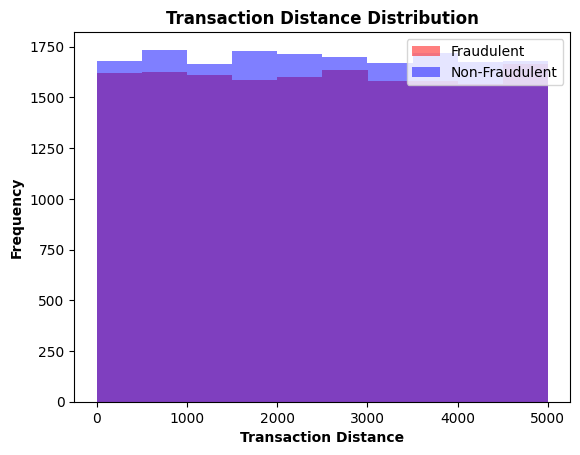

In [244]:


plt.hist(fraudulent_data['Transaction_Distance'], bins=10, alpha=0.5, label='Fraudulent', color='red')
plt.hist(no_fraudulent_data['Transaction_Distance'].sample(frac=0.5,random_state=42), bins=10, alpha=0.5, label='Non-Fraudulent', color='blue')
plt.xlabel('Transaction Distance',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.title('Transaction Distance Distribution',fontweight='bold')
plt.legend()
plt.show()
#Not much correlation between the average the transaction distance

In [245]:
fraudulent_data['Transaction_Distance'].describe()
#min	0.560000, 25%	1239.700000, 50%	2496.660000,75%	3750.465000, max	4999.910000
no_fraudulent_data['Transaction_Distance'].describe()
#Min 0.250000, 25%	1265.480000, 50%	2487.680000, 75%	3743.980000, max	4999.930000
#no correaltion

,Transaction_Distance
count,33933.000000
mean,2499.278762
std,1438.548071
min,0.250000
25%,1265.480000
50%,2487.680000
75%,3743.980000
max,4999.930000


#Risk Score

In [246]:
fraudulent_data.shape
#16067
no_fraudulent_data.shape
#33933
print(33933/16067)
#2.1
#Going to remove half of the n fraudulent data with no bias involved to get more accurate results
half_of_no_fraudulent_data=no_fraudulent_data.sample(frac=0.5,random_state=42)
half_of_no_fraudulent_data.shape
#now it has a similiar amount to the fraudulent data so histograms will be comparable

2.111968631356196


(16966, 22)

0.6629038837368519
0.4251583768013439


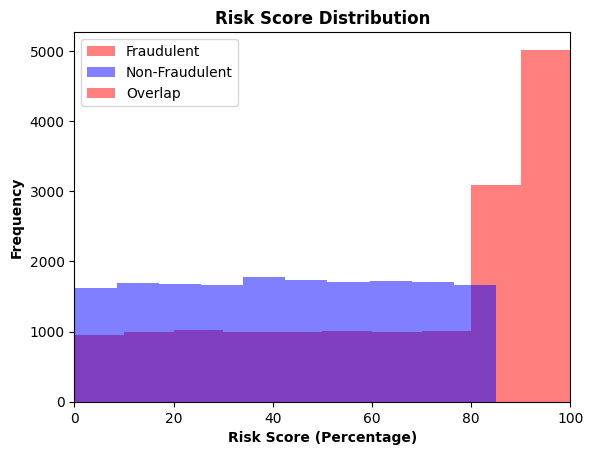

In [247]:
print(fraudulent_data['Risk_Score'].mean())
print(no_fraudulent_data['Risk_Score'].mean())
#Risk Score is much higher in fraudulent datatypes
#Making the amounts of fraud data and no fraud data equal
x=fraudulent_data['Risk_Score']
y=half_of_no_fraudulent_data['Risk_Score']
plt.hist(x*100, bins=10, alpha=0.5, label='Fraudulent', color='red')
plt.hist(y*100, bins=10, alpha=0.5, label='Non-Fraudulent', color='blue')
plt.xlim(0,100)
plt.legend(labels=['Fraudulent', 'Non-Fraudulent', 'Overlap'])
plt.xlabel('Risk Score (Percentage)',fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Risk Score Distribution',fontweight='bold')
plt.show()
#Found that risk score has a high correlation with fraud


In [248]:
fraud_and_no_fraud=ftd_df.groupby('Fraud_Label').value_counts()
print(fraudulent_data[fraudulent_data['Risk_Score']>=0.7].value_counts())
#Found 9115 Fraudulent Datasets when the risk score was over .7
half_of_no_fraudulent_data[half_of_no_fraudulent_data['Risk_Score']>=0.7].value_counts()
#Found 2947 No fraud data with risk score over .7
#69.5% chance that a risk score over .7 is fraudulent

fraudulent_data[fraudulent_data['Risk_Score']>=0.76].value_counts()
#Found 8504 Fraudulent Datasets when Risk was .76
half_of_no_fraudulent_data[half_of_no_fraudulent_data['Risk_Score']>=0.76].value_counts()
#Found 1747 non fraud data
#8504+1747
#10251
print(8504/10251)
#83% accurate at .76

fraudulent_data[fraudulent_data['Risk_Score']>=0.86].value_counts()
half_of_no_fraudulent_data[half_of_no_fraudulent_data['Risk_Score']>=0.86].value_counts()
print(9)
#Risk score over 86 is 100% chance of fraud
#IDed 7909 Datasets with fraud from risk score over .86


Transaction_ID  User_ID    Transaction_Amount  Transaction_Type  Timestamp            Account_Balance  Device_Type  Location  Merchant_Category  IP_Address_Flag  Percent_Of_Money_Taken  Previous_Fraudulent_Activity  Daily_Transaction_Count  Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Type   Card_Age  Transaction_Distance  Authentication_Method  Risk_Score  Is_Weekend  Fraud_Label
TXN_9998        USER_2999  213.79              Bank Transfer     2023-12-24 12:39:00  58886.60         Tablet       London    Restaurants        0                0.003631                0                             14                       261.21                     1                            Amex        115       4079.74               Password               0.9462      1           1              1
TXN_10001       USER_6445  27.52               Online            2023-04-04 08:40:00  18273.83         Mobile       New York  Clothing           0                0.001506                0        

# Weekend

In [249]:
print(fraudulent_data['Is_Weekend'].value_counts())
print(half_of_no_fraudulent_data['Is_Weekend'].value_counts())
#About the same not much correlation

Is_Weekend
0    11252
1     4815
Name: count, dtype: int64
Is_Weekend
0    11857
1     5109
Name: count, dtype: int64


# AVG Transaction Count

In [250]:
fraudulent_data['Avg_Transaction_Amount_7d'].describe()
half_of_no_fraudulent_data['Avg_Transaction_Amount_7d'].describe()
#Not much correlation between the two
print(fraudulent_data['Daily_Transaction_Count'].describe())
print(half_of_no_fraudulent_data['Daily_Transaction_Count'].describe())
#Not much correlation between the two

count    16067.000000
mean         7.443767
std          4.038098
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: Daily_Transaction_Count, dtype: float64
count    16966.000000
mean         7.519392
std          4.034300
min          1.000000
25%          4.000000
50%          8.000000
75%         11.000000
max         14.000000
Name: Daily_Transaction_Count, dtype: float64


# Date and Time

In [251]:
#Looking at data understanding the datatype
ftd_df['Timestamp'].describe()
#changing the Time into a numerical value based on year
ftd_df['Timestamp']
ftd_df_hour_time_stamp=pd.to_datetime(ftd_df['Timestamp'])
ftd_df_hour_time_stamp
ftd_df_hour_time_stamp=ftd_df_hour_time_stamp.dt.hour
ftd_df_hour_time_stamp
ftd_df.insert(2,'Hour_Time_Stamp',ftd_df_hour_time_stamp)
ftd_df.insert(3,'Month_Time_Stamp',ftd_df_hour_time_stamp)
ftd_df_fraud_hour_time_stamp=ftd_df[ftd_df['Fraud_Label']==1]
ftd_df_no_fraud_hour_time_stamp=ftd_df[ftd_df['Fraud_Label']==0]
print(ftd_df_fraud_hour_time_stamp['Hour_Time_Stamp'].describe())
print(ftd_df_no_fraud_hour_time_stamp['Hour_Time_Stamp'].describe())
#NO correlation between the hour time and fraud

count    16067.000000
mean        11.574781
std          6.881920
min          0.000000
25%          6.000000
50%         12.000000
75%         17.000000
max         23.000000
Name: Hour_Time_Stamp, dtype: float64
count    33933.000000
mean        11.488728
std          6.911980
min          0.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         23.000000
Name: Hour_Time_Stamp, dtype: float64


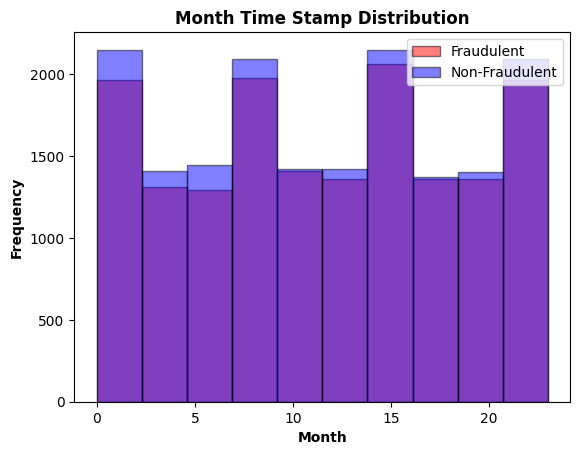

In [252]:
#Now checking if the month had any correlation with fraud
ftd_df['Timestamp']
ftd_df_month_time_stamp=pd.to_datetime(ftd_df['Timestamp'])
#Changes time to datetime on pandas (numerical)
ftd_df_month_time_stamp=ftd_df_month_time_stamp.dt.month
ftd_df_month_time_stamp
#makes it equal the mnth time
ftd_df_month_fraud=ftd_df[ftd_df['Fraud_Label']==1]
ftd_df_month_no_fraud=ftd_df[ftd_df['Fraud_Label']==0].sample(frac=0.5,random_state=42)
x=ftd_df_month_fraud['Month_Time_Stamp']
y=ftd_df_month_no_fraud['Month_Time_Stamp']
plt.hist(x, bins=10, alpha=0.5, label='Fraudulent', color='Red', edgecolor='black')
plt.hist(y, bins=10,alpha=0.5, label= 'Non-Fraudulent', color='blue',edgecolor='black')
plt.ylabel('Frequency',fontweight='bold')
plt.xlabel('Month',fontweight='bold')
plt.title('Month Time Stamp Distribution',fontweight='bold')
plt.legend()
plt.show()

From this information, I found there isn't much correlation between the time of day or month with fraud, but I noticed that in the month histogram created, there were significantly more fraud vs no fraud transactions that occured during the months of January and December.

# Creating a conditional collumn to help my machine learning model

After researching every column and finding different correlations with fraud, I decided to create a column that tracks a value. If the value exceeds a certain limit, then it will mark 'fraud' or 'no fraud' into another column that I created. This will later be implemented into my machine learning model to better its accuracy.

# Inserting Value Counter Column

In [253]:
ftd_df.insert(1,'Value Counter',0)

# Inserting a Conditional Column for Value Counter

In [254]:
ftd_df.insert(2, 'Conditional Counter', 'False')

# Writing Conditions for Value Counter

In [255]:

#100% chance of people with 4+ card declines being fraudulent applies to most fraud cards
#32% chance of someone committing fraud if they have already
#Card Type doesn't have correlation with fraud
#Risk Score over .86 detects fraud with 100% accuracy


# Put my Value Counter at 0 before applying conditions to it
ftd_df['Value Counter'] = 0
# Added 100 to Value Counter for failed transactions at 4 attempts (100% Chance of Fraud)
ftd_df['Value Counter'] = np.where(ftd_df['Failed_Transaction_Count_7d'] == 4, ftd_df['Value Counter'] + 100, ftd_df['Value Counter'])

# Added 50 to Value Counter if Previous Fraud is True is 1 (32% chance of fraud)
ftd_df['Value Counter'] = np.where(ftd_df['Previous_Fraudulent_Activity'] == 1, ftd_df['Value Counter'] + 50, ftd_df['Value Counter'])

# Added 100 to Value Counter for Risk Score over .86 (100% accurate)
ftd_df['Value Counter'] = np.where(ftd_df['Risk_Score'] >= 0.86, ftd_df['Value Counter'] + 100, ftd_df['Value Counter'])

#Making conditional print true or false based on the previous data
ftd_df['Conditional Counter'] = np.where(ftd_df['Value Counter'] >= 100, 'True', 'False')





In [256]:
#Comparing how accurate Conditional Counter is with the Fraud Label
print(ftd_df['Conditional Counter'].value_counts())
print(ftd_df['Fraud_Label'].value_counts())
print(16067-15670)
print(50000-397)
print(49603/50000)
#99.2% Accuracy Mostly False Negatives (wanted)
#Decided to form a confusion matrix to confirm beliefs

Conditional Counter
False    34330
True     15670
Name: count, dtype: int64
Fraud_Label
0    33933
1    16067
Name: count, dtype: int64
397
49603
0.99206


# Confusion Matrix to Display Data

In [257]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = ftd_df['Fraud_Label']
# Convert 'Conditional Counter' from string ('True', 'False') to integer (1, 0)
y_pred = ftd_df['Conditional Counter'].replace({'True': 1, 'False': 0}).astype(int)



/tmp/ipython-input-1937586293.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_pred = ftd_df['Conditional Counter'].replace({'True': 1, 'False': 0}).astype(int)


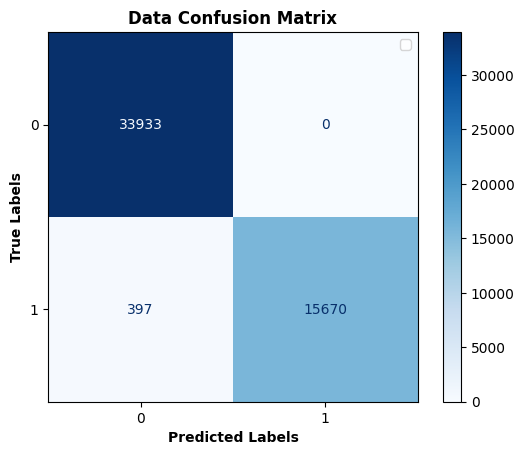

In [258]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Data Confusion Matrix',fontweight='bold')
plt.xlabel('Predicted Labels',fontweight='bold')
plt.ylabel('True Labels',fontweight='bold')
plt.legend(labels=['Fraudulent', 'Non-Fraudulent'])
plt.show()
#Showing the predicted values vs actual values
#397 False Negatives 99.2% Accuracy

# Finding Correlation Among False Negatives

At this point, I have created a model that detects 99% of Fraud in this dataset using multiple different variables;however, there are still 397 false negatives in the dataset. From here, I worked to find correlation among the remaining values to further increase my overall accuracy of my model.

In [259]:
false_negatives_boom = (y_true == 1) & (y_pred == 0)
false_negatives_real=false_negatives_boom[false_negatives_boom==True]
false_negatives_real
ftd_df.insert(11,'False Negatives',false_negatives_real)


In [260]:
ftd_df['False Negatives']

,False Negatives
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
49995,NaN
49996,NaN
49997,NaN
49998,NaN


# Correlation among false positives

In [261]:
false_negative = ftd_df[ftd_df['False Negatives'] == True]
#made a false_negative dataset and now going to compare false negative
#correlation with fraud and see what they have in common to see if false negatives have anything in common
# Select only the numeric columns from the data
number_false_negative = false_negative.select_dtypes(include=np.number)
correlation_matrix = number_false_negative.corr()
display(correlation_matrix['Value Counter'])
#Had to remove strings (troubleshooting bc it didn't work otherwise)

#Transaction amount has a very slight amount of correlation as well as previous fraud

,Value Counter
Value Counter,1.000000
Hour_Time_Stamp,0.016458
Month_Time_Stamp,0.016458
Transaction_Amount,0.127024
Account_Balance,-0.019286
IP_Address_Flag,0.027748
Percent_Of_Money_Taken,0.024185
Previous_Fraudulent_Activity,1.000000
Daily_Transaction_Count,0.027464
Avg_Transaction_Amount_7d,0.007122


# Finding Correlation among false positives and transaction amounts

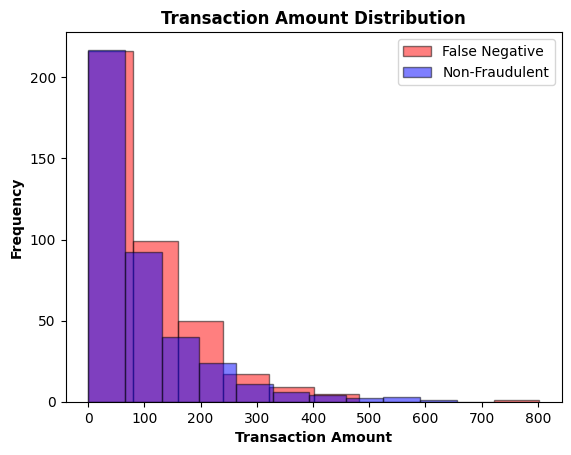

In [262]:
x=false_negative['Transaction_Amount']
x1=ftd_df['Transaction_Amount'].sample(frac=0.008,random_state=42)
plt.hist(x, bins=10, alpha=0.5, label='False Negative', color='Red', edgecolor='black')
plt.hist(x1, bins=10, alpha=0.5, label='Non-Fraudulent', color='blue',edgecolor='black')
x1.shape
plt.ylabel('Frequency',fontweight='bold')
plt.xlabel('Transaction Amount',fontweight='bold')
plt.title('Transaction Amount Distribution',fontweight='bold')
plt.legend()
plt.show()
#Transaction amount has a very very slight correlation

# Improved my Fraud Variable Predictor

From here, I added a 25 value if you met the condition of money spent over 150 to the value counter

In [263]:
#Copy and pasting earlier code# Put my Value Counter at 0 before applying conditions to it
ftd_df['Value Counter'] = 0
# Added 100 to Value Counter for failed transactions at 4 attempts (100% Chance of Fraud)
ftd_df['Value Counter'] = np.where(ftd_df['Failed_Transaction_Count_7d'] == 4, ftd_df['Value Counter'] + 100, ftd_df['Value Counter'])

# Added 50 to Value Counter if Previous Fraud is True is 1 (32% chance of fraud)
ftd_df['Value Counter'] = np.where(ftd_df['Previous_Fraudulent_Activity'] == 1, ftd_df['Value Counter'] + 50, ftd_df['Value Counter'])

# Added 100 to Value Counter for Risk Score over .86 (100% accurate)
ftd_df['Value Counter'] = np.where(ftd_df['Risk_Score'] >= 0.86, ftd_df['Value Counter'] + 100, ftd_df['Value Counter'])

#Making conditional print true or false based on the previous data
ftd_df['Conditional Counter'] = np.where(ftd_df['Value Counter'] >= 100, 'True', 'False')

# Added 25 to Value COunter if el Risk Score is over .83
ftd_df['Value Counter'] = np.where(ftd_df['Risk_Score'] >= 0.83, ftd_df['Value Counter'] + 25, ftd_df['Value Counter'])

#Added 25 to value counter if the transactin amount exceeded 150 but was under 500
ftd_df['Value Counter'] = np.where((ftd_df['Transaction_Amount'] >= 150) & (ftd_df['Transaction_Amount'] < 500), ftd_df['Value Counter'] + 25,ftd_df['Value Counter'])

#Making conditional print true or false based on the previous data
ftd_df['Conditional Counter'] = np.where(ftd_df['Value Counter'] >= 100, 1, 0)


From here I ran my model to see how accurate it was and if it improved in overall accuracy.

In [264]:
y_true = ftd_df['Fraud_Label']
# Convert 'Conditional Counter' from string ('True', 'False') to integer (1, 0)
y_pred = ftd_df['Conditional Counter'].replace({'True': 1, 'False': 0}).astype(int)

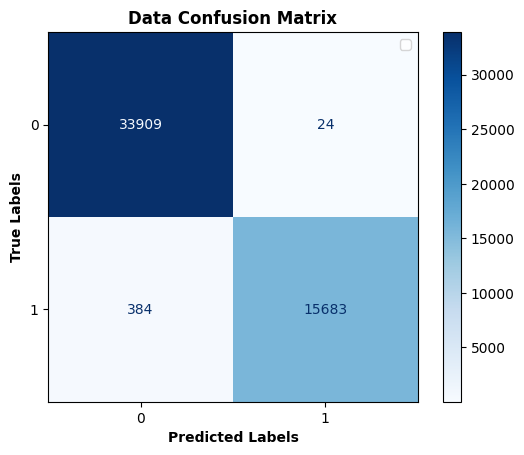

In [265]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Data Confusion Matrix',fontweight='bold')
plt.xlabel('Predicted Labels',fontweight='bold')
plt.ylabel('True Labels',fontweight='bold')
plt.legend(labels=['Fraudulent', 'Non-Fraudulent'])
plt.show()
#Showing the predicted values vs actual values
#406 false values
#384 false negatives(-11 from earlier model)
#24 false positives(+24 from earlier model)

In [266]:
print(50000-(384+24))
print(49592/50000)
#99.18% accurate
#Recall score= 98.9% accurate (better recall score better model overall)

49592
0.99184


Found more false positives as expected;however minimized the number of false negatives slightly

Both models 99% accurate second predicts fewer false negatives but overall more inaccurate data vs first mdel predicts 99% correct; has greater accuracy overall; but predicts more false negatives

#Machine Learning Model

After my EDA, and the multiple different variables I've created I used a machine learning model to make the data even more accurate using both the variables I created to predict fraud, and other variables.

In [267]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
x_prepare=ftd_df.select_dtypes(exclude=['category','object'])
ftd_df

,Transaction_ID,Value Counter,Conditional Counter,User_ID,Hour_Time_Stamp,Month_Time_Stamp,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,25,0,USER_1834,19,19,39.79,POS,2023-08-14 19:30:00,93213.17,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,100,1,USER_7875,4,4,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,125,1,USER_2734,15,15,28.96,Online,2023-06-20 15:25:00,1588.96,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,125,1,USER_2617,0,0,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,150,1,USER_2014,23,23,31.28,POS,2023-11-11 23:44:00,92354.66,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,0,0,USER_4796,18,18,45.05,Online,2023-01-29 18:38:00,76960.11,...,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0
49996,TXN_44732,100,1,USER_1171,8,8,126.15,POS,2023-05-09 08:55:00,28791.75,...,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49997,TXN_38158,50,0,USER_2510,19,19,72.02,Online,2023-01-30 19:32:00,29916.41,...,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0
49998,TXN_860,100,1,USER_2248,19,19,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,...,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


In [268]:
#Dropping categories used/don't need(no correlation) and non-numeric columns
x=x_prepare[['Conditional Counter','Hour_Time_Stamp','Month_Time_Stamp','Avg_Transaction_Amount_7d','Daily_Transaction_Count','Value Counter']]
y=ftd_df['Fraud_Label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [269]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [270]:
ftd_df

,Transaction_ID,Value Counter,Conditional Counter,User_ID,Hour_Time_Stamp,Month_Time_Stamp,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,25,0,USER_1834,19,19,39.79,POS,2023-08-14 19:30:00,93213.17,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,100,1,USER_7875,4,4,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,125,1,USER_2734,15,15,28.96,Online,2023-06-20 15:25:00,1588.96,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,125,1,USER_2617,0,0,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,150,1,USER_2014,23,23,31.28,POS,2023-11-11 23:44:00,92354.66,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,0,0,USER_4796,18,18,45.05,Online,2023-01-29 18:38:00,76960.11,...,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0
49996,TXN_44732,100,1,USER_1171,8,8,126.15,POS,2023-05-09 08:55:00,28791.75,...,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49997,TXN_38158,50,0,USER_2510,19,19,72.02,Online,2023-01-30 19:32:00,29916.41,...,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0
49998,TXN_860,100,1,USER_2248,19,19,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,...,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


In [271]:
x_train.head()

,Conditional Counter,Hour_Time_Stamp,Month_Time_Stamp,Avg_Transaction_Amount_7d,Daily_Transaction_Count,Value Counter
39087,1,16,16,112.75,5,100
30893,0,5,5,199.95,8,25
45278,0,23,23,234.75,7,0
16398,0,13,13,344.98,8,0
13653,0,6,6,456.77,6,0


In [272]:
model.fit(x_train,y_train)
#One value was true/false fixed earlier on


KNeighborsClassifier()

In [273]:
predictions=model.predict(x_test)

In [306]:
y_test

,Fraud_Label
33553,0
9427,0
199,0
12447,1
39489,0
...,...
28567,0
25079,0
18707,0
15200,0


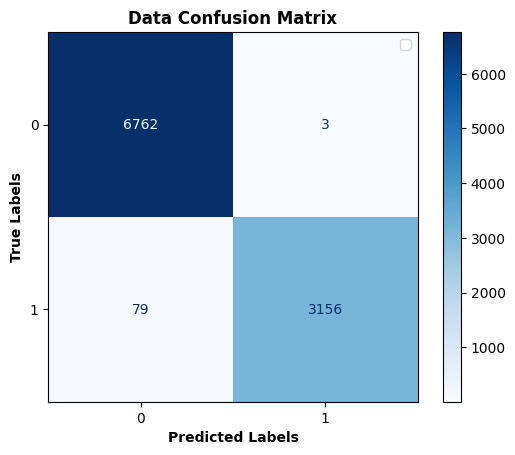

In [274]:
predictions=model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Data Confusion Matrix',fontweight='bold')
plt.xlabel('Predicted Labels',fontweight='bold')
plt.ylabel('True Labels',fontweight='bold')
plt.legend(labels=['Fraudulent', 'Non-Fraudulent'])
plt.show()


Mostly

In [275]:
print(3156+6762)
print(9918/(9918+82))
#99.2% accuracy
print(6762/(6762+79))
#98.9% Recall Score

9918
0.9918
0.9884519807045754


# T Test to Find if Results are Significant

Null Hypothesis: There is no difference between machine learning model created and the actual test data

In [310]:
from scipy.stats import ttest_ind
import numpy as np
#Comparing machine learning model to actual test data
t_statistic, p_value = ttest_ind(y_test, predictions)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.152311092661421
P-value: 0.24920703478093678


From here, I determined that the results from the machine learning program were significant. I decided to research other machine learning programs for binary numerical variables to make my model more accurate.

# Logistic Regression Model

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [278]:
x2=x_prepare[['Conditional Counter','Hour_Time_Stamp','Month_Time_Stamp','Avg_Transaction_Amount_7d','Daily_Transaction_Count','Value Counter']]
y2=ftd_df['Fraud_Label']

In [279]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [296]:
#Smaller dataset so will be using liblinear (faster and more efficient with smaller datasets)
model2 = LogisticRegression(solver='liblinear', random_state=42)

In [297]:
model2.fit(X_train2, y_train2)

LogisticRegression(random_state=42, solver='liblinear')

In [299]:
predictions2=model2.predict(X_test2)
#predictions2 predicts X_Testing

In [295]:
print(y_test2)
print(predictions2)

33553    0
9427     0
199      0
12447    1
39489    0
        ..
28567    0
25079    0
18707    0
15200    0
5857     1
Name: Fraud_Label, Length: 10000, dtype: int64
[0 0 0 ... 0 0 1]


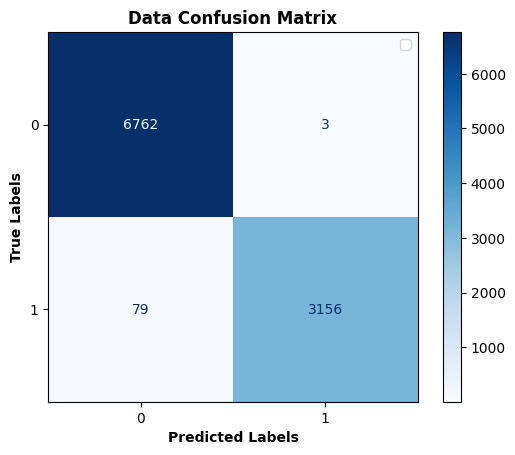

In [291]:
cm = confusion_matrix(y_test2, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Data Confusion Matrix',fontweight='bold')
plt.xlabel('Predicted Labels',fontweight='bold')
plt.ylabel('True Labels',fontweight='bold')
plt.legend(labels=['Fraudulent', 'Non-Fraudulent'])
plt.show()

Identical to other confusion matrix values are well fitted